In [8]:
from __future__ import division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylanet
import emcee
import corner

import astropy.units as u
from astropy.constants import G

% matplotlib inline

In [2]:
#kep = pylanet.data.getData(11017901,"./downloadedData/",cadence="both")
kep = pylanet.data.getData(2.01,"./downloadedData/",cadence="long")

Target: KIC 10666592.
67 data files.
cadence is long
period is 2.204735417


In [3]:
rawTs=kep.times
rawFs=kep.sap_fluxs
rawEs=kep.sap_flux_errs

In [4]:
ts,fs,es=pylanet.data.cleanData(rawTs,rawFs,rawEs,kep.period,detrendMethod='doubleBox',nMin=1500)
print(ts.size,' data points')

(20767, ' data points')


In [5]:
sTs,sFs,sEs=pylanet.data.stackData(ts,fs,es,kep.period,nTs=512)

sTs2,sFs2,sEs2=pylanet.data.stackData(ts,fs,es,kep.period,nTs=64)

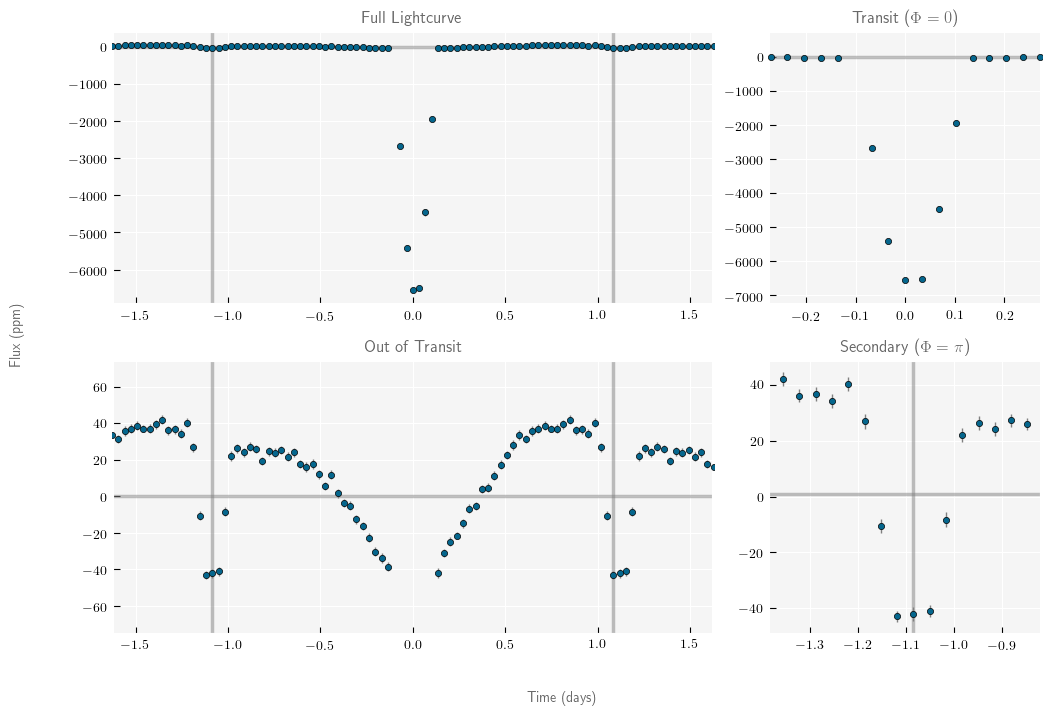

In [6]:
thisFig,thisGrid=pylanet.plot.makeFig()
#pylanet.plot.plotData(thisGrid,sTs,sFs,sEs,period=kep.period)
pylanet.plot.plotData(thisGrid,sTs2,sFs2,sEs2,period=kep.period)
plt.show()

In [4]:
print np.shape(kep1800.times)
print type(kep1800.times)
print np.shape(kep1800.cadencenos)

print np.shape(np.hstack(kep1800.times))
print np.shape(np.hstack(kep1800.sap_fluxs))
#help(kep10)

(14,)
<type 'list'>
(14,)
(53320,)
(53320,)


In [5]:
#t1800 = np.hstack(kep1800.times)
#f1800 = np.hstack(kep1800.sap_fluxs)

t1800_nonans = []
f1800_norm = []
e1800_nonans = []

for i in range(0,len(kep1800.sap_fluxs)):
    t = (kep1800.times[i])[~np.isnan(kep1800.sap_fluxs[i])]
    f = (kep1800.sap_fluxs[i])[~np.isnan(kep1800.sap_fluxs[i])]
    e = (kep1800.sap_flux_errs[i])[~np.isnan(kep1800.sap_flux_errs[i])]
    f1800_norm.append(f/np.mean(f))
    t1800_nonans.append(t)
    e1800_nonans.append(e)
    

t1800 = np.hstack((t1800_nonans))
n1800 = np.hstack((f1800_norm))
e1800 = np.hstack((e1800_norm))


In [6]:
colorcycle = ['b','r','g','m','k','c','y']

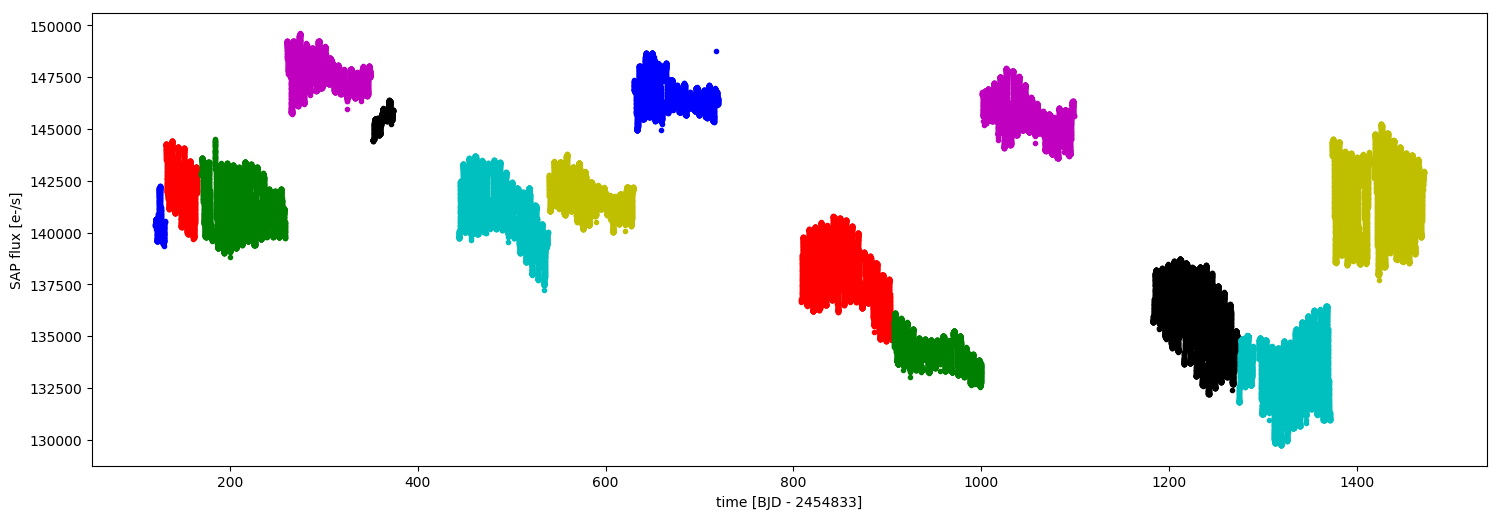

In [7]:
fig = plt.figure(figsize=(18,6))

for i in range(0,len(kep1800.times)):
    plt.plot(kep1800.times[i],kep1800.sap_fluxs[i],color=colorcycle[i%7],marker='.',ls='None',alpha=1)
#plt.xlim(240,250)
#plt.ylim(42000,43500)
plt.xlabel("time [BJD - 2454833]")
plt.ylabel("SAP flux [e-/s]")
#plt.show()
plt.savefig("./koi1800.01.png",fmt="png")

In [8]:
def get_phases(t,P,t0):
    """ 
    Given input times, a period (or posterior dist of periods)
    and time of transit center (or posterior), returns the 
    phase at each time t.
    """
    if type(t) is not float:
        phase = ((t - np.median(t0))/np.median(P)) % 1 
        ii = np.where(phase>=0.5)[0]
        phase[ii] = phase[ii]-1.0
    else:
        phase = ((t - np.median(t0))/np.median(P)) % 1 
        if phase>=0.5:
            phase = phase - 1.0 
    return phase

In [9]:
p1800 = get_phases(t=t1800, P=7.794302, t0=137.26038)

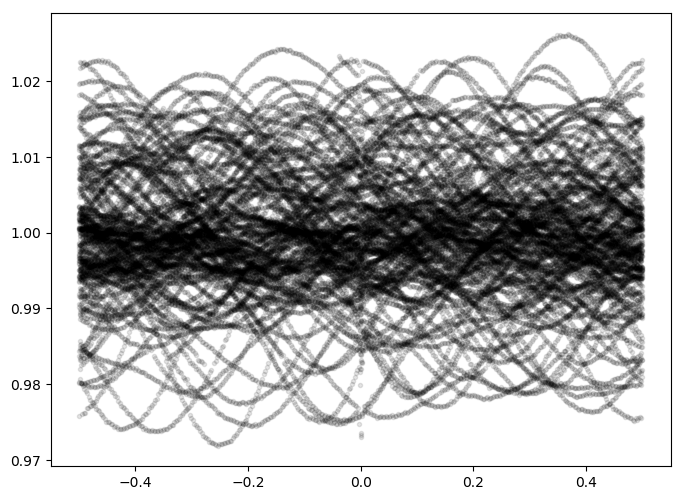

In [10]:
fig = plt.figure(figsize=(8,6))
plt.plot(p1800,n1800,'k.',alpha=0.1)
plt.show()